# Analysis of queue throughput measurements

In [288]:
import pandas as pd

In [289]:
df = pd.read_csv("measurements.csv")

In [290]:
# filter to last run
latest_run = df['run'].max()
df.drop(df[(df.run < latest_run)].index, inplace=True)


In [291]:
def plot_profile(profile):
    df1 = df.loc[df["profile"] == profile]
    if not df1.empty:
        df2: pd.DataFrame = df1.pivot(index='items', columns='storage_engine', values='throughput')
        plt = df2.plot(title=f"Throughput with profile {profile} (#{latest_run})", style='.-')
        plt.set_ylim(bottom=0)
        return plt

In [292]:
plot_profile("minimum")

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
plot_profile("medium")

In [ ]:
plot_profile("heavy")

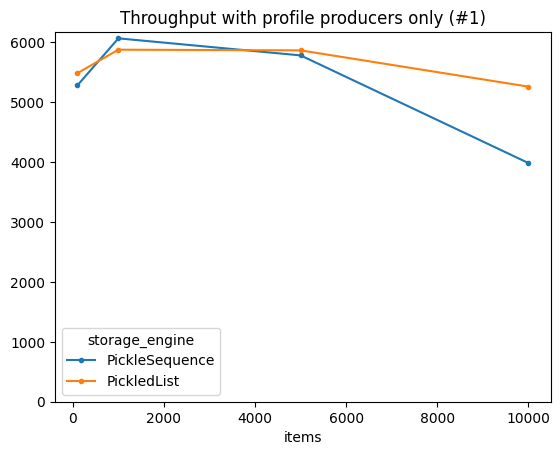

In [ ]:
plot_profile("producers only")

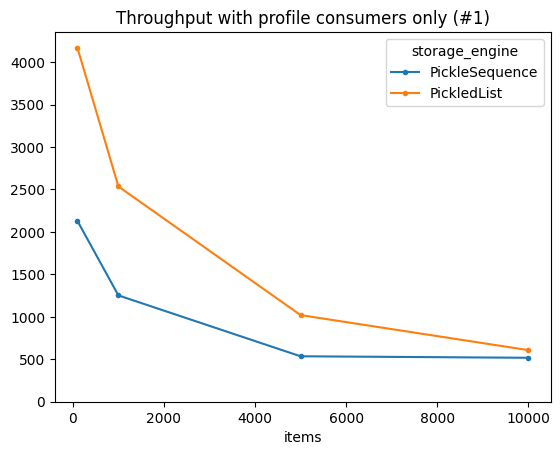

In [ ]:
plot_profile("consumers only")